In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Input normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)

class_num = y_test.shape[1]
class_num
X_train.shape

def lr_schedule(epoch):
  init_lr = 0.001
  if epoch <= 50:
    return init_lr
  else:
    return init_lr * 0.1

lr_scheduler = LearningRateScheduler(lr_schedule)

170498071/170498071 [==============================] - 4s 0us/step


# CNN Model from Scratch

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=[lr_scheduler])

Epoch 1/100
782/782 [==============================] - 25s 13ms/step - loss: 1.6725 - accuracy: 0.4229 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 10s 12ms/step - loss: 1.1299 - accuracy: 0.5990 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 9s 12ms/step - loss: 0.9444 - accuracy: 0.6679 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 10s 12ms/step - loss: 0.8290 - accuracy: 0.7087 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - loss: 0.7512 - accuracy: 0.7397 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6866 - accuracy: 0.7624 - lr: 0.0010
Epoch 7/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6366 - accuracy: 0.7830 - lr: 0.0010
Epoch 8/100
782/782 [==============================] - 9s 12ms/step - loss: 0.6041 - accuracy: 0.7914 - lr: 0.0010
Epoch 9/100
782/782 [==============================] - 10s 13ms/step - los

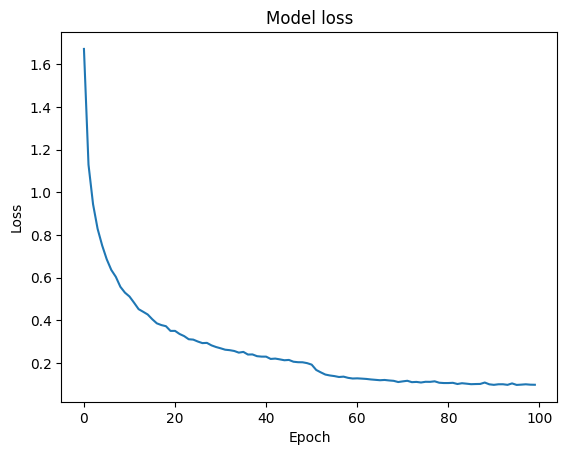

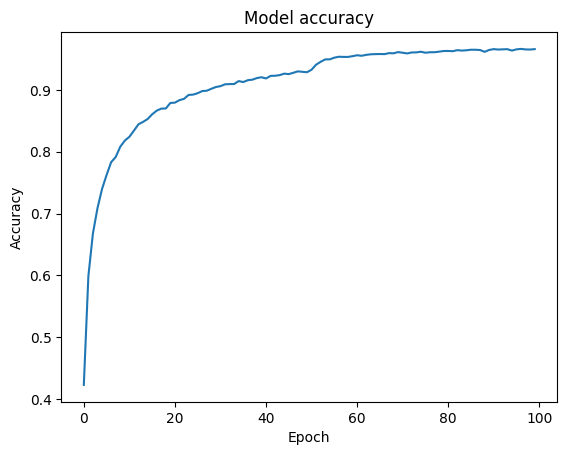

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 4ms/step - loss: 0.4828 - accuracy: 0.8824
Test Accuracy: 88.24%


In [ ]:
tf.keras.backend.clear_session()

# Transfer Learning with VGG-16

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(X_train)

# VGG16 base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Build a custom classifier on top of the base model
model = tf.keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

base_model.trainable = True

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                         

In [ ]:
history = model.fit( datagen.flow(X_train, y_train, batch_size=64), epochs=100, callbacks = [lr_scheduler] )

Epoch 1/100
782/782 [==============================] - 57s 48ms/step - loss: 1.9687 - accuracy: 0.2219 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 38s 48ms/step - loss: 1.6153 - accuracy: 0.3743 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 37s 48ms/step - loss: 1.3509 - accuracy: 0.4977 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 37s 48ms/step - loss: 1.1720 - accuracy: 0.5861 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 38s 48ms/step - loss: 1.0399 - accuracy: 0.6384 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 37s 48ms/step - loss: 0.9562 - accuracy: 0.6789 - lr: 0.0010
Epoch 7/100
782/782 [==============================] - 38s 48ms/step - loss: 0.8726 - accuracy: 0.7088 - lr: 0.0010
Epoch 8/100
782/782 [==============================] - 38s 48ms/step - loss: 0.8220 - accuracy: 0.7308 - lr: 0.0010
Epoch 9/100
782/782 [==============================] - 37s 48ms/step - l

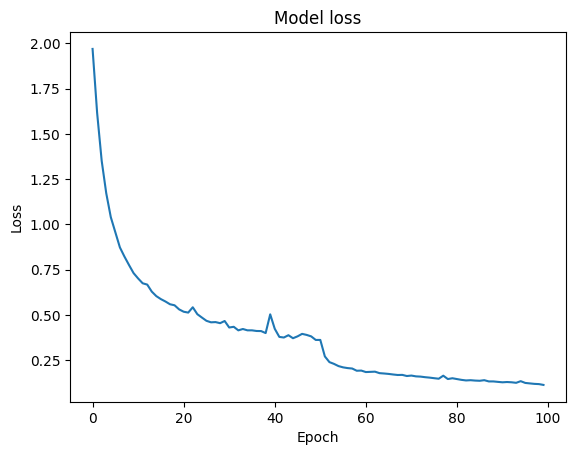

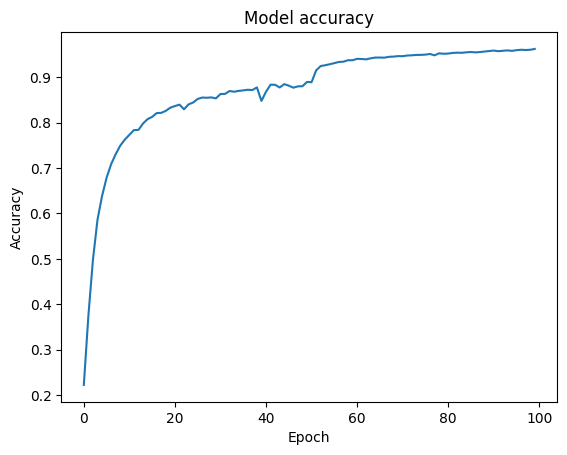

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.5760 - accuracy: 0.8877
Test Accuracy: 88.77%
